#**Predicting Transaction Price of Apartments in Tokyo**

**Team 4 Members**: Harry Hu, Husain Ghadiali, Raj Patel, Yiwen Fan <br>
**Notebook Link**: [Click here](https://colab.research.google.com/drive/1HAjPILBDN2X4FG0xKyMfTfoRqATC1x6C?usp=share_link)

**Table of Contents**

1. [Overview](#scrollTo=S8gjt8gBKTW2)
2. [Column Preprocessing & Data Preparation](#scrollTo=RjxQTNdFM6sH)
3. [Model Evaluation](#scrollTo=_rHor5TcPHrp&line=1&uniqifier=1)
4. [Model Fine Tuning](#scrollTo=46dkqjKr3Zn1)
5. [Model Deployment](#scrollTo=JgX5wjmlEuhy)

#1.Overview

## 1.1 Business Problem

In this analysis, we aim at predicting the transcation price of a certain apartment in Tokyo, Japan, given a number of attributes.
We are using several regression models from `scikit-learn` to build a predictive solution. 

## 1.2 Motivation

Analyzing this data can help us solve several problems. Both the real estate industry and local governments can use this information to make strategic business decisions. Real estate agencies can use this to get a better understanding of the housing market and be able to predict transaction prices based on specific variables. 

An example of this is determining transaction prices based on location. This can help new and existing homeowners get a better understanding of the value of their properties. 


Local Governments can also use this analysis to implement better housing policies which can help residents accommodate to affordable living zones within the city. They can also provide tax credits, deductions, and subsidies to residents based on the real estate market.

## 1.3 Data Source

The dataset used in this analysis is collected and provided by Ministry of Land, Infrastructure, Transport and Tourism (MLIT) of Japan. It contains real estate transcation price information of 47 prefectures in Japan. In our analysis, we focus on the real estate transcation price information in Tokyo from 2016 to 2019.

Source of the dataset: https://www.land.mlit.go.jp/webland_english/servlet/MainServlet

## 1.4 Column Description

Detailed descriptions of every column in this dataset are listed in the following table.

<center><b>Column Description Table</b>

Column Name | Description | Data Type | Numeric or Categorical | Null | Comment |
----|----|:----:|:----:|:----:|----|
0. No <font color ='red'>drop</font> | an extra column contains all the index values |int|-|no|This column is irrelevant to our analysis
1. Type <font color ='red'>drop</font> | real estate type | object | - | no |There is redundancy in this column due to having similiar information in the other columns.
2. Region <font color ='red'>drop</font> | the characteristics of surrounding areas | object | - | yes | There is redundancy in this column due to having similiar information in the other columns.
3. Municipality Code <font color ='red'>drop</font> | City code of Japan | int | - | no | The information in this column is irrelevant to our analysis
4. Prefecture <font color ='red'>drop</font> | Prefecture Name of Japan | oject | - | no | Prefecture is equivalent to State. For this analysis we only focus on Tokyo, rendering this column irrelevant.
5. Municipality |In which location the property is located|object|categorical| no |1. Change column name to `Location`; 2. `ward` to `urban`, others to `suburban`
6. DistrictName <font color ='red'>drop</font> | The name of the district where the property is located | object | - | yes |There is redundancy in this column due to having similiar information in the other columns.
7. NearestStation <font color ='red'>drop</font> | The name of the nearest station to the property | object | - | yes | This column is irrelevant to our analysis
8. TimeToNearestStation <font color ='red'>drop</font> | Time to the nearest station | object || yes |There is redundancy in this column due to having similiar information in the other columns.
9. MinTimeToNearestStation |the minimum time distance (minute) from the location of the property to the nearest train station |float|Numeric|yes| use this column plus `MaxTimeToNearestStation` column to calculate the average time
10. MaxTimeToNearestStation |the maximum time distance (minute) from the location of the property to the nearest train station|float|Numeric|yes|1. drop rows where this value is null. 2. calculate average time with min
11. TradePrice <font color = 'orange'>response variable</font> | Total transaction value of the property |int|Numeric|no| This is the response variable of our analysis
12. FloorPlan |room layout|object|Numeric|no|convert to the number of bedroom
13. Area | the registered area ($m^2$) of the property | int | Numeric | no | check for the max value 
14. AreaIsGreaterFlag <font color ='red'>drop</font> | An area of 2000 $m^2$ or greater, the area data are displayed 2000, and this flag is `true` | int | - | no | This is only a derived column from the `Area` column, which contains redundant information
15. Unit Price <font color ='red'>drop</font> | Unit Land Price(Yen) per $m^2$ | float | - | yes | There is redundancy in this column due to having similiar information in the other columns.
16. PricePerTsubo <font color ='red'>drop</font>| Unit Land Price(Yen) per Tsubo. Tsubo is a japanese units | float | - | yes | There is redundancy in this column due to having similiar information in the other columns.
17. LandShape <font color ='red'>drop</font> | the shape of the land on which the property is located | object | - | yes | This column is irrelevant to our analysis.
18. Frontage <font color ='red'>drop</font>| The width of the street in front of the property in ($m$) | float | - | yes |This column is irrelevant to our analysis.
19. FrontageIsGreaterFlag <font color ='red'>drop</font> | For properties with frontage data records "50.0m or longer." this flag is set to true | bool | - | no | This column is irrelevant to our analysis.
20. TotalFloorArea <font color ='red'>drop</font>| the total Floor Area ($m^2$) | float | - | yes | This column is irrelevant to our analysis.
21. TotalFloorAreaIsGreaterFlag <font color ='red'>drop</font>|For data that are "2,000 $m^2$ or greater”, this flag is set to true | int | - | no | This column is irrelevant to our analysis.
22. BuildingYear | construction year of the property | float |Categorical|yes|1. we need to group `BuildingYear` entires into different bins <br> 2. We are using this column and the `Year` (Transaction Year) to calculate the Age of the building
23. PrewarBuilding <font color ='red'>drop</font>| buildings built before 1945 are documented as 1945, and the flag is set to true | float | - | yes | There is redundancy in this column due to having similiar information in the other columns.
24. Structure | the structure of each building | object | categorical |yes| keep SRC, RC, & S, group all others into 'Others'
25. Use | the current usage of the property | object | categorical |yes| keep `house` (include any value with the keyword 'house') and group others into `others`
26. Purpose <font color ='red'>drop</font>| the purpose of future use. For example, House, shop, office, factory, warehouse, and other | object | - | yes | There is redundancy in this column due to having similiar information in the other columns.
27. Direction <font color ='red'>drop</font>| the direction towards which the property is facing | object | - | yes | This column is irrelevant to our analysis.
28. Classification <font color ='red'>drop</font>| frontage road Classification | object | - | yes | This column is irrelevant to our analysis.
29. Breadth <font color ='red'>drop</font>| frontage road width(m) | float | - | yes | This column is irrelevant to our analysis.
30. CityPlanning | the district names disgnated by the City Planning Act, which represents the use of the block |object|categorical|yes| drop `Outside City Planning Area`, group others into 3 categories
31. CoverageRatio <font color ='red'>drop</font>| Maximus Building Coverage Ratio(%)|float|-|yes| This column is irrelevant to our analysis.
32. FloorAreaRatio <font color ='red'>drop</font>|Maximus Floor-area Ratio(%)|float|-|yes| This column is irrelevant to our analysis.
33. Period <font color ='red'>drop</font>|time of transaction (yea + qaurter column)| object |-|no| There is redundancy in this column due to having similiar information in the other columns.
34. Year | transaction Year |int|catgeorical|no| 1.use this and `BuildingYear` to calcualte the age of the Apartment 2. keep the year from 2016 - 2019
35. Quarter <font color ='red'>drop</font>|time of transaction year-quarter|int|-|no| There is redundancy in this column due to having similiar information in the other columns.
36. Renovation | the state of renovation of the property at the time of transaction |object|categorical|yes| TBD 
37. Remarks <font color ='red'>drop</font>|Note from the people who put together the dataset|object|-|yes| This column is irrelevant to our analysis.

</center>
<br><br>

After dropping the extra columns, we end up with 13 columns in total. Among which, the response variable is `tradePrice`. There are 8 categorical features, and 4 numerical features.

##1.5 Basic Overview of the Dataset



In this section we explore the housing dataset. We check for null values, count of unique values, and perform other basic explorations to have a holistic view of the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.style.use('seaborn-white')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_folder = '/content/drive/Shareddrives/ba810 group project/data/'
house = pd.read_csv(data_folder + 'Japan Real Estate Prices by MLIT (original data) .csv',index_col = False)
house.shape

Mounted at /content/drive


(406575, 38)

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406575 entries, 0 to 406574
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   No                           406575 non-null  int64  
 1   Type                         406575 non-null  object 
 2   Region                       221704 non-null  object 
 3   MunicipalityCode             406575 non-null  int64  
 4   Prefecture                   406575 non-null  object 
 5   Municipality                 406575 non-null  object 
 6   DistrictName                 406329 non-null  object 
 7   NearestStation               404847 non-null  object 
 8   TimeToNearestStation         396236 non-null  object 
 9   MinTimeToNearestStation      396236 non-null  float64
 10  MaxTimeToNearestStation      396086 non-null  float64
 11  TradePrice                   406575 non-null  int64  
 12  FloorPlan                    178131 non-null  object 
 13 

In [ ]:
house.nunique()

No                             406575
Type                                5
Region                              4
MunicipalityCode                   59
Prefecture                          1
Municipality                       59
DistrictName                     1448
NearestStation                    657
TimeToNearestStation               34
MinTimeToNearestStation            34
MaxTimeToNearestStation            33
TradePrice                        504
FloorPlan                          48
Area                              157
AreaIsGreaterFlag                   2
UnitPrice                         412
PricePerTsubo                     408
LandShape                           9
Frontage                          477
FrontageIsGreaterFlag               2
TotalFloorArea                    129
TotalFloorAreaIsGreaterFlag         2
BuildingYear                       76
PrewarBuilding                      2
Structure                          26
Use                               206
Purpose     

In [ ]:
house.head(5)

,No,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,...,Classification,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks
0,1,"Pre-owned Condominiums, etc.",NaN,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,4.0,...,NaN,NaN,Commercial Zone,80.0,500.0,3rd quarter 2019,2019,3,Not yet,NaN
1,2,"Pre-owned Condominiums, etc.",NaN,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,4.0,...,NaN,NaN,Commercial Zone,80.0,500.0,3rd quarter 2019,2019,3,Done,NaN
2,3,Residential Land(Land and Building),Commercial Area,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,2,2.0,...,Ward Road,4.0,Commercial Zone,80.0,500.0,2nd quarter 2019,2019,2,NaN,NaN
3,4,Residential Land(Land and Building),Commercial Area,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,1,1.0,...,Tokyo Metropolitan Road,27.0,Commercial Zone,80.0,700.0,2nd quarter 2019,2019,2,NaN,NaN
4,5,"Pre-owned Condominiums, etc.",NaN,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,4.0,...,NaN,NaN,Commercial Zone,80.0,500.0,2nd quarter 2019,2019,2,Done,NaN


In [ ]:
df = house.copy()

In [ ]:
# dropping columns, keep TimeToNearestStation as we need it for transformation later

df = df.drop(df.columns[[0, 1, 2, 3, 4, 6, 7, 14, 15, 16, 17, 18, 19, 20, 21, 23, 26, 27, 28, 29, 31, 32, 33, 35, 36, 37]], axis = 1)

In [ ]:
df.columns

Index(['Municipality', 'TimeToNearestStation', 'MinTimeToNearestStation',
       'MaxTimeToNearestStation', 'TradePrice', 'FloorPlan', 'Area',
       'BuildingYear', 'Structure', 'Use', 'CityPlanning', 'Year'],
      dtype='object')

In [ ]:
# keep records after 2016

df = df[df['Year'] > 2015]

In [ ]:
# check year values

df.Year.describe()

count    114467.000000
mean       2017.315689
std           1.054274
min        2016.000000
25%        2016.000000
50%        2017.000000
75%        2018.000000
max        2019.000000
Name: Year, dtype: float64

In [ ]:
# keep only the records on apartments
# drop all houses which do not have floorplan (only properties with floorplan are apartments)

df = df.dropna(subset = ['FloorPlan']) 

not_apart = ['Open Floor', 'Duplex'] # these two types are also not apartments
df = df[df.FloorPlan.isin(not_apart) == False]

##1.6 Correlation Analysis

From the heatmap, there is a relatively strong correlation between `Area` and `TradePrice`. Correlation coefficients between `MinTimeToNearestStation` and `MaxTimeToNearestStation` is close to 1, however, it's clear that collinearity occurs between these two variables.

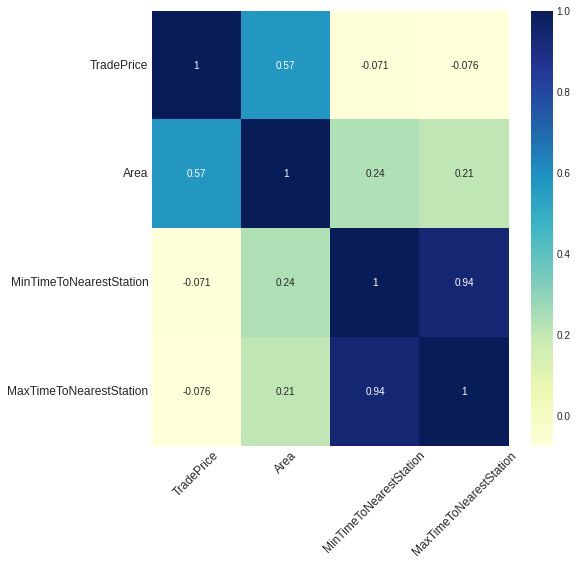

In [ ]:
# Correlation between numeric variables

attributes = ["TradePrice", "Area", "MinTimeToNearestStation",
              "MaxTimeToNearestStation"]

corr = df[attributes].corr()

f, ax = plt.subplots(figsize=(8, 8))

ax = sns.heatmap(corr, annot=True, cmap="YlGnBu")
ax.set_xticklabels(attributes, rotation=45, fontsize = 12)
ax.set_yticklabels(attributes, rotation=0, fontsize = 12);

In [ ]:
corr["TradePrice"].sort_values(ascending=False)

TradePrice                 1.000000
Area                       0.572674
MinTimeToNearestStation   -0.070975
MaxTimeToNearestStation   -0.075529
Name: TradePrice, dtype: float64

<Figure size 432x288 with 0 Axes>

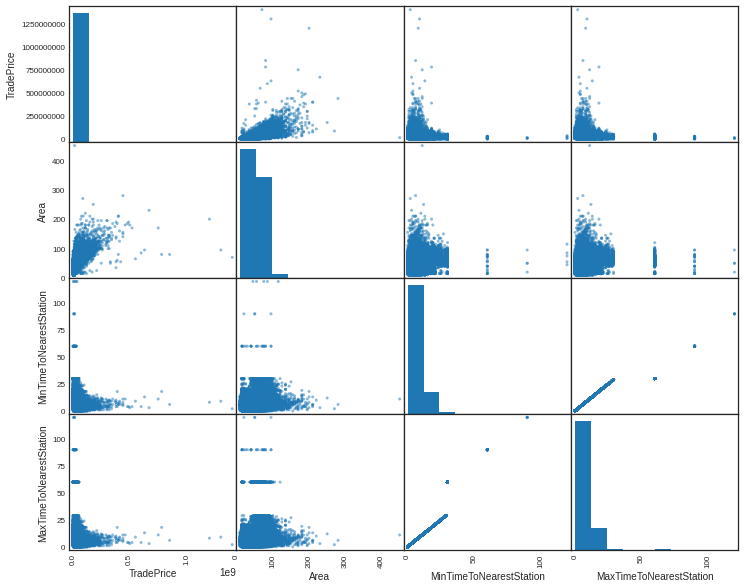

In [ ]:
from pandas.plotting import scatter_matrix
plt.clf()
attributes = ["TradePrice", "Area", "MinTimeToNearestStation",
              "MaxTimeToNearestStation"]
scatter_matrix(df[attributes], figsize=(12, 10))
plt.show()

#2.Column Preprocessing & Data Preparation

##2.1 Column Transformations

###2.1.1 Municipality

Approximately three-quarters of the population of Tokyo Metropolis live in the “23 special wards” which are located in the eastern section of Tokyo. The remainder living in outer Tokyo which accounts for approximately two-thirds of the land area. 

For the 50 nested labels within the `municipality` column, if they contain the keyword `ward` we map them into the `Urban` category and rest to `Suburban`.

In [ ]:
# Group records contain word "ward" as "Urban", and the others as "Suburban"

df["Location"] = np.where(df["Municipality"].str.contains(" Ward"), "Urban", "Suburban")
df.Location.value_counts()

Urban       45733
Suburban     7734
Name: Location, dtype: int64

In [ ]:
# drop Municipality column

df.drop(columns = 'Municipality', axis = 1, inplace = True)

In [ ]:
df.columns

Index(['TimeToNearestStation', 'MinTimeToNearestStation',
       'MaxTimeToNearestStation', 'TradePrice', 'FloorPlan', 'Area',
       'BuildingYear', 'Structure', 'Use', 'CityPlanning', 'Year', 'Location'],
      dtype='object')

###2.1.2 Min & Max time to nearest station

`TimeToNearestStation` shows the the time distance (in minutes) from the location of the property to the nearest train station (for subway, to the ground entrance). 

For the non-numeric values in `TimeToNearestStation`, for example "1H-1H30", are splitted as `60` into `MinTimeToNearestStation` and as `90` into `MaxTimeToNearestStation`. 

We calculate the average time to the nearest station based on the values from `MinTimeToNearestStation` and `MaxTimeToNearestStation`. 

In [ ]:
# use these two columns to calculate the average time to neareast station

df['AvgTimeToNearestStation'] = df[['MinTimeToNearestStation','MaxTimeToNearestStation']].mean(axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53467 entries, 0 to 358449
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TimeToNearestStation     53402 non-null  object 
 1   MinTimeToNearestStation  53402 non-null  float64
 2   MaxTimeToNearestStation  53397 non-null  float64
 3   TradePrice               53467 non-null  int64  
 4   FloorPlan                53467 non-null  object 
 5   Area                     53467 non-null  int64  
 6   BuildingYear             52084 non-null  float64
 7   Structure                52688 non-null  object 
 8   Use                      43397 non-null  object 
 9   CityPlanning             52998 non-null  object 
 10  Year                     53467 non-null  int64  
 11  Location                 53467 non-null  object 
 12  AvgTimeToNearestStation  53402 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 5.7+ MB


In [ ]:
# Changing these particular AvgtimeToNearestStation with "2H-" to NaN

df.loc[df.TimeToNearestStation == '2H-', 'AvgTimeToNearestStation'] = np.NaN

In [ ]:
# Drop TimeToNearestStation, MinTimeToNearestStation, and MaxTimeToNearestStation

df = df.drop(df.columns[[0,1,2]], axis = 1)

###2.1.3 FloorPlan

For the `FloorPlan`, it contains information about the room layout of each property, for example: 1K, 2LDK, 3LDK, 4LDK and etc. 

We create a new column named `RoomCount` storing only the first number of the labels which represent the number of bedrooms in each property.

In [ ]:
# create a new RoomCount column, to get the first number (which represents # of the bedroom) from the values of the FloorPlan column

df["RoomCount"] = df["FloorPlan"].apply(lambda x: x[0])

In [ ]:
# for StudioApartment, we are changing the letter S to 1

df["RoomCount"] = df["RoomCount"].replace('S','1')

In [ ]:
# convert the entire column into integer

df['RoomCount'] = df['RoomCount'].astype(int)

In [ ]:
# check the RoomCount column

df.RoomCount

0         1
1         3
4         2
6         1
7         1
         ..
357658    3
357662    3
358297    1
358300    2
358449    2
Name: RoomCount, Length: 53467, dtype: int64

In [ ]:
# drop FloorPlan column

df.drop(columns = 'FloorPlan', inplace = True)

In [ ]:
df.columns

Index(['TradePrice', 'Area', 'BuildingYear', 'Structure', 'Use',
       'CityPlanning', 'Year', 'Location', 'AvgTimeToNearestStation',
       'RoomCount'],
      dtype='object')

###2.1.4 BuildingYear

The first transformation of this variable is to create a new column named `Age` which stores the age of the property at the time of the transaction.

In [ ]:
# create a new column named 'Age' which stores the age of the property at the time of the transaction

df["Age"] = df["Year"] - df["BuildingYear"]

The second transformation of this variable is to group building years into several buckets. In 1981, the Building Standard Act in Japan was revised and the New Anti-seismic Design Code came into effect. Therefore, we group properties that were built before 1982 as "pre 1982" and map other properties into "1982-1989", "1990-1999", "2000-2009", and "2010-2019".


Reference for the "Building Standard Act" : https://www.realestate-tokyo.com/news/earthquake-resistance-of-buildings-in-japan/

In [ ]:
# grouping building years into bins (create a new column as 'ConstructionYear')
# 1. for all the records before 1982, group into one bin: 'pre 1982' (reason: Japanese Building Stadards Act changed)
# 2. for all the records from 1982 (included) to 2019: 1982-1989, 1990-1999, 2000-2009, 2010-2019 

In [ ]:
# step 1
df.loc[df.BuildingYear < 1982, 'ConstructionYear'] = 'Pre 1982'

In [ ]:
# step 2
df.loc[(df.BuildingYear > 1981) & (df.BuildingYear < 1990), 'ConstructionYear'] = '1982-1989'

In [ ]:
df.loc[(df.BuildingYear > 1989) & (df.BuildingYear < 2000), 'ConstructionYear'] = '1990-1999'

In [ ]:
df.loc[(df.BuildingYear > 1999) & (df.BuildingYear < 2010), 'ConstructionYear'] = '2000-2009'

In [ ]:
df.loc[df.BuildingYear > 2009, 'ConstructionYear'] = '2010-2019'

In [ ]:
df.ConstructionYear.value_counts()

2000-2009    20140
2010-2019     9969
1990-1999     9743
1982-1989     6179
Pre 1982      6053
Name: ConstructionYear, dtype: int64

###2.1.5 Structure

The structure of each building is provided using the following abbreviations:
"SRC" stands for "Steel frame reinforced concrete", "RC" stands for "Reinforced concrete", "LS" stands for "Light steel structure" and etc. Since most of the values fall into "RC", "SRC" and "S", we group the other type of sructures into "others". 

In [ ]:
df.Structure.value_counts()

RC         37761
SRC        14480
S            367
SRC, RC       62
RC, S          8
LS             6
SRC, S         3
W              1
Name: Structure, dtype: int64

In [ ]:
# keep RC, SRC, S, map all other structure types into 'others'

s_mapping = {'SRC, RC': 'Others', 'RC, S': 'Others', 'LS': 'Others', 'SRC, S': 'Others', 'W': 'Others'}

df['Structure'] = df['Structure'].replace(s_mapping)

In [ ]:
df.Structure.value_counts()

RC        37761
SRC       14480
S           367
Others       80
Name: Structure, dtype: int64

###2.1.6 Use

`Use` tells about the current usage of the property. For multiple-use cases, all uses are listed. For example: House, office, warehouse, workshop, parking lot, and others. Judging by the number of entries, we map all usage into "House" and "Other".


In [ ]:
df.Use.value_counts()

House                  43248
Office                    83
Other                     35
House, Office             10
Shop                       9
House, Shop                4
House, Other               3
House, Warehouse           1
Office, Parking Lot        1
Warehouse                  1
House, Parking Lot         1
Factory                    1
Name: Use, dtype: int64

In [ ]:
# juding by the number of entries of a use type of 'House' and others, it would be wise to map categories into only two categories: 'House', & 'Other'

u_mapping = {'House, Office': 'House', 'House, Warehouse': 'House', 'House, Shop': 'House',
           'House, Parking Lot': 'House', 'House, Other': 'House', 'Other': 'Other',
           'Shop': 'Other', 'Warehouse': 'Other', 'Factory': 'Other', 'Office, Parking Lot': 'Other', 'Office': 'Other'}

df['Use'] = df['Use'].replace(u_mapping)

In [ ]:
df.Use.value_counts()

House    43267
Other      130
Name: Use, dtype: int64

###2.1.7 CityPlanning

`CityPlanning` contains the use of districts designated by the City Planning Act. 

In [ ]:
# checking unique values in 'CityPlanning'

pd.unique(df['CityPlanning'])

array(['Commercial Zone', 'Category II Residential Zone',
       'Category I Residential Zone', nan, 'Quasi-industrial Zone',
       'Quasi-residential Zone',
       'Category I Exclusively Medium-high Residential Zone',
       'Category II Exclusively Medium-high Residential Zone',
       'Neighborhood Commercial Zone',
       'Category I Exclusively Low-story Residential Zone',
       'Category II Exclusively Low-story Residential Zone',
       'Industrial Zone', 'Exclusively Industrial Zone',
       'Urbanization Control Area', 'Quasi-city Planning Area',
       'Outside City Planning Area'], dtype=object)

In [ ]:
# how many values in each categories in the 'CityPlanning' column?

df['CityPlanning'].value_counts()

Commercial Zone                                         16957
Quasi-industrial Zone                                   10213
Neighborhood Commercial Zone                             7165
Category I Exclusively Medium-high Residential Zone      6407
Category I Residential Zone                              5320
Category I Exclusively Low-story Residential Zone        1853
Category II Residential Zone                             1706
Category II Exclusively Medium-high Residential Zone     1208
Industrial Zone                                          1051
Quasi-residential Zone                                    980
Category II Exclusively Low-story Residential Zone        115
Exclusively Industrial Zone                                17
Quasi-city Planning Area                                    4
Urbanization Control Area                                   1
Outside City Planning Area                                  1
Name: CityPlanning, dtype: int64

Judging by the number of different categories under the `CityPlanning column`, the following transformations should be performed:

- Dropping the `Outside City Planning Area` due to only 1 entry

- Mapping the resting categories into 4 general categories:

  1. Commercial
  2. Industrial
  3. Residential

In [ ]:
# dropping outside City Planning Area

drop_areas = ['Quasi-city Planning Area', 'Outside City Planning Area', 'Urbanization Control Area']
df = df[df.CityPlanning.isin(drop_areas) == False]

In [ ]:
# mapping

c_mapping = {'Quasi-industrial Zone': 'Industrial Zone', 'Neighborhood Commercial Zone': 'Commercial Zone', 'Category I Exclusively Medium-high Residential Zone': 'Residential Zone',
           'Category I Residential Zone': 'Residential Zone', 'Category I Exclusively Low-story Residential Zone': 'Residential Zone',
           'Category II Residential Zone': 'Residential Zone', 'Category II Exclusively Medium-high Residential Zone': 'Residential Zone',
           'Quasi-residential Zone': 'Residential Zone', 'Category II Exclusively Low-story Residential Zone': 'Residential Zone', 'Exclusively Industrial Zone': 'Industrial Zone'}

df['CityPlanning'] = df['CityPlanning'].replace(c_mapping)

In [ ]:
# check the result

pd.unique(df['CityPlanning'])

array(['Commercial Zone', 'Residential Zone', nan, 'Industrial Zone'],
      dtype=object)

##2.2 Checking the Dataframe Post-Transformation

In [ ]:
df.head()

,TradePrice,Area,BuildingYear,Structure,Use,CityPlanning,Year,Location,AvgTimeToNearestStation,RoomCount,Age,ConstructionYear
0,40000000,30,2013.0,RC,House,Commercial Zone,2019,Urban,4.0,1,6.0,2010-2019
1,130000000,80,2007.0,RC,NaN,Commercial Zone,2019,Urban,4.0,3,12.0,2000-2009
4,100000000,65,2007.0,RC,House,Commercial Zone,2019,Urban,4.0,2,12.0,2000-2009
6,24000000,35,1985.0,SRC,House,Commercial Zone,2018,Urban,3.0,1,33.0,1982-1989
7,13000000,20,1982.0,SRC,NaN,Commercial Zone,2018,Urban,4.0,1,36.0,1982-1989


In [ ]:
df.shape

(53461, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53461 entries, 0 to 358449
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TradePrice               53461 non-null  int64  
 1   Area                     53461 non-null  int64  
 2   BuildingYear             52080 non-null  float64
 3   Structure                52687 non-null  object 
 4   Use                      43397 non-null  object 
 5   CityPlanning             52992 non-null  object 
 6   Year                     53461 non-null  int64  
 7   Location                 53461 non-null  object 
 8   AvgTimeToNearestStation  53391 non-null  float64
 9   RoomCount                53461 non-null  int64  
 10  Age                      52080 non-null  float64
 11  ConstructionYear         52080 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 5.3+ MB


##2.3 Creating Train & Test Data

Splitting the dataset to get the training and testing data with a 80-20 split.

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
len(train_set), len(test_set)

(42768, 10693)

##2.4 Building the Pipeline

After preparing the dataset and performing the required operations, we build the pipeline.

In [ ]:
# check null

df.isna().sum()

TradePrice                     0
Area                           0
BuildingYear                1381
Structure                    774
Use                        10064
CityPlanning                 469
Year                           0
Location                       0
AvgTimeToNearestStation       70
RoomCount                      0
Age                         1381
ConstructionYear            1381
dtype: int64

In [ ]:
# building the pipeline 2

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

num_attribs = ["Area", "BuildingYear", "Year", "AvgTimeToNearestStation",
               "RoomCount", "Age"]

cat_attribs = ["Structure", "Use", "CityPlanning", "Location", "ConstructionYear"]

num_pipeline = Pipeline([
    ("impute", IterativeImputer()), 
    ("standardize", StandardScaler())
])
    
cat_pipeline = Pipeline([
    #("impute", IterativeImputer(estimator = RandomForestClassifier(random_state = 0))),
    ("impute", SimpleImputer(strategy = "most_frequent")),
    ("dummify", OneHotEncoder(sparse=False, drop = 'first'))
])

pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
    ])

In [ ]:
from sklearn import set_config

set_config(display='diagram') 

pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', IterativeImputer()),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['Area', 'BuildingYear', 'Year',
                                  'AvgTimeToNearestStation', 'RoomCount',
                                  'Age']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('dummify',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['Structure', 'Use', 'CityPlanning',
                                  'Location', 'ConstructionYear'])])

In [ ]:
# making two new dataframes storing the predictors and the response

df_X = train_set.drop("TradePrice", axis=1)
df_y = train_set["TradePrice"]
print(df_X.head())

        Area  BuildingYear Structure    Use      CityPlanning  Year  Location  \
62184     25        1988.0        RC  House   Industrial Zone  2016     Urban   
284268    70        2007.0        RC  House   Industrial Zone  2016  Suburban   
6952      50        2014.0        RC  House  Residential Zone  2016     Urban   
59265     45        1984.0       SRC  House   Commercial Zone  2016     Urban   
202162    45           NaN        RC  House  Residential Zone  2016     Urban   

        AvgTimeToNearestStation  RoomCount   Age ConstructionYear  
62184                       5.0          1  28.0        1982-1989  
284268                      6.0          3   9.0        2000-2009  
6952                        5.0          2   2.0        2010-2019  
59265                       6.0          2  32.0        1982-1989  
202162                     12.0          2   NaN              NaN  


In [ ]:
# fitting the model

X_train = pipeline.fit_transform(df_X)
y_train = df_y.values

#3.Model Evaluation

For model evaluation, we use cross validation method to further enhance our accuracy. We set the `random_state` of each model to 90, and `cv` to 10.

## 3.1 Linear Regression

*Linear Regression is a machine learning algorithm that attempts to model the relationship between the independent variables and the depenedent variable.*

We use Linear Regression to understand the relation of the independent variables on the `tradeprice` variable.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = make_pipeline(pipeline, LinearRegression())
lin_reg.fit(df_X, df_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer()),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Area', 'BuildingYear',
                                                   'Year',
                                                   'AvgTimeToNearestStation',
                                                   'RoomCount', 'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('dummify',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Structure', 'Use',
                                                   'CityPlanning', 'Location',
                                                   'ConstructionYear'])])),
                ('linearregression', LinearRegression())])

In [ ]:
lin_reg_score = cross_val_score(lin_reg,df_X, df_y, cv=10, scoring="r2" )
print('Linear Regression Model R-square Score: {:.4f}'.format(lin_reg_score.mean()))

Linear Regression Model R-square Score: 0.5674


For this model of Linear Regression, we get an $R^2$ of `0.5674.`
This shows that roughly 56% of the variablity of the `tradeprice` is explained by the linear regression model.

------------------------------------------------------------------------------------------------------------------------------------

##3.2 Lasso Regression

*Lasso Regression is a regularization technique, used over regression methods to get a more accurate prediction.
The model uses a shrinkage method wherein it shrinks the data values towards a central point as in the mean.*

It is also primirarily used when the data is suspected to show signs of multicollinearity. We use this model to address this concern and check for multicollinearity in the dataset.

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

lasso_cv_pipe = make_pipeline(pipeline, LassoCV(cv = 10, random_state=90))
lasso_cv_pipe.fit(df_X, df_y) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer()),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Area', 'BuildingYear',
                                                   'Year',
                                                   'AvgTimeToNearestStation',
                                                   'RoomCount', 'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('dummify',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Structure', 'Use',
                                                   'CityPlanning', 'Location',
                                                   'ConstructionYear'])])),
                ('lassocv', LassoCV(cv=10, random_state=90))])

In [ ]:
lasso_cv_pipe.score(df_X, df_y)
print('Lasso Regression Model R-square Score: {:.4f}'.format(lasso_cv_pipe.score(df_X, df_y).mean()))

Lasso Regression Model R-square Score: 0.5613


This model of Lasso Regression gives us an $R^2$ score of `0.5613`, thus measuring about 56% of the variability of the `tradeprice` variable.

##3.3 Ridge Regression

*Ridge Regression is used to analyze data that may contain multicollinearity, using L2 regularization. The ridge model is especially good at imporoving the least-squares estimate when multicollinearity is present.*

In [ ]:
from sklearn.linear_model import RidgeCV

ridge_cv_pipe = make_pipeline(pipeline, RidgeCV(cv = 10))
ridge_cv_pipe.fit(df_X, df_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer()),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Area', 'BuildingYear',
                                                   'Year',
                                                   'AvgTimeToNearestStation',
                                                   'RoomCount', 'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('dummify',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Structure', 'Use',
                                                   'CityPlanning', 'Location',
                                                   'ConstructionYear'])])),
                ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10))])

In [ ]:
ridge_cv_pipe.score(df_X, df_y)
print('Ridge Regression Model R-square Score: {:.4f}'.format(ridge_cv_pipe.score(df_X, df_y).mean()))

Ridge Regression Model R-square Score: 0.5614


The Ridge Regression model gives us an $R^2$ score of `0.5614`. Therefore explaining about 56% of the variability of `tradeprice` variable.



## 3.4 SGD Regressor

*Stochastic Gradient Descent is an optimization model in machine learning that attempts to find the model parameters that correspond to the best fit between predicted and actual outputs.*

In [ ]:
from sklearn.linear_model import SGDRegressor
sgdr_reg = make_pipeline(pipeline, SGDRegressor(random_state=90))
sgdr_reg.fit(df_X, df_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer()),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Area', 'BuildingYear',
                                                   'Year',
                                                   'AvgTimeToNearestStation',
                                                   'RoomCount', 'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('dummify',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Structure', 'Use',
                                                   'CityPlanning', 'Location',
                                                   'ConstructionYear'])])),
                ('sgdregressor', SGDRegressor(random_state=90))])

In [ ]:
sgdr_reg_score = cross_val_score(sgdr_reg, df_X, df_y, cv=10, scoring="r2")
print('SGD Regressor Model R-square Score: {:.4f}'.format(sgdr_reg_score.mean()))

SGD Regressor Model R-square Score: 0.5667


The SGD Regressor model gives us an $R^2$ score of 0.5667, thus explaining about 56.67% of 
the variability thats occuring in the `tradeprice` variable.

## 3.5 Linear Support Vector Regression

*Linear Support Vector Regression (SVR) allows models to choose how much error is acceptable and will determine a parameter that best fits the model.*

We choose to run this model as it allows for more flexibility in choosing penalties and our models to scale better with a large number of samples.

In [ ]:
from sklearn.svm import LinearSVR

lsvr_reg = make_pipeline(pipeline, LinearSVR(random_state=90))
lsvr_reg.fit(df_X, df_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer()),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Area', 'BuildingYear',
                                                   'Year',
                                                   'AvgTimeToNearestStation',
                                                   'RoomCount', 'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('dummify',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Structure', 'Use',
                                                   'CityPlanning', 'Location',
                                                   'ConstructionYear'])])),
                ('linearsvr', LinearSVR(random_state=90))])

In [ ]:
lsvr_reg_score = cross_val_score(lsvr_reg, df_X, df_y, cv=10, scoring="r2" )
print('Linear Support Vector Regression Model R-square Score: {:.4f}'.format(lsvr_reg_score.mean()))

Linear Support Vector Regression Model R-square Score: -1.6432


Using the linear SVR, we got an $R^2$ of `-1.6432`, which represents that the model does not fit well with the data. We have chosen to exclude this model.

##3.6 Decision Tree Regressor

*Decision Tree models are supervised learning models that can be used for 
regression and classification. It creates subsets of the dataset by splitting the data into a tree-like pattern in smaller subsets. It predicts the output based on the subset that the set of features falls into.*

We use the Decision Tree Regressor to perform prediction analysis of the `tradeprice` variable. 

**Additionally, we took the advice from Professor Sahoo to search for the optimal alpha value before fitting the `DecisionTreeRegressor` as this particular model will be significantly handicapped without tuning the alpha first, rendering its $R^2$ score to be lower than that of others using the base model.**

In [ ]:
# Pruning the tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

reg_full = DecisionTreeRegressor().fit(X_train, y_train)
path_reg = reg_full.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path_reg.ccp_alphas, path_reg.impurities

# we set the negative ccp_alpha values to 0 so it does not return errors when we try to grid search

ccp_alphas[ccp_alphas<0] = 0

In [ ]:
# Identify the best alpha value using GridSearch

from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from scipy.stats import randint

param_grid = {'ccp_alpha': ccp_alphas}

halving_grid_search = HalvingGridSearchCV(DecisionTreeRegressor(random_state=90), param_grid, cv=5, scoring='r2', random_state=90)
halving_grid_search.fit(X_train, y_train)
halving_grid_search.best_estimator_

DecisionTreeRegressor(ccp_alpha=58454.91956602782, random_state=90)

In [ ]:
# using the best alpha value to train

from sklearn.tree import DecisionTreeRegressor

decision_tree_pipe = make_pipeline(pipeline, halving_grid_search.best_estimator_)
decision_tree_scores = cross_val_score(decision_tree_pipe, df_X, df_y, cv=10, scoring='r2')
decision_tree_scores.mean().round(2)

print('Decision Tree Regressor Model R-square Score: {:.4f}'.format(decision_tree_scores.mean()))

Decision Tree Regressor Model R-square Score: 0.4446


We get a $R^2$ score of 0.4446 by using this model, therefore explaining about 44.46% of the variability of the `tradeprice` variable.

##3.7 Random Forest Regressor

*Random Forest Regression is an estimator that fits multiple decision trees on several sub-samples and uses the average to make better predictive accuracy estimations and control over-fitting in the models.*

Random Forest Regression is also suitable for large datasets such as this one, and it can determine transaction prices based on the decision criteria chosen.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rdf_pipe = make_pipeline(pipeline, RandomForestRegressor(random_state=90))
rdf_scores = cross_val_score(rdf_pipe, df_X, df_y, cv=10, scoring='r2')
rdf_scores.mean().round(2)

print('Random Forest Regressor Model R-square Score: {:.4f}'.format(rdf_scores.mean()))

Test data R^2: 0.6604


Based on our computation, we got an $R^2$ of .6604, which was our highest $R^2$ from all the models, explaining about 66.04% of 
the variability thats occuring in the `tradeprice` variable.

We compare models with positive R-squared score to find the one with highest R-squared score.

In [ ]:
# Evaluating Models using r2

model_eval = pd.DataFrame({'Model': ['Linear Regression','Lasso Regression','Ridge Regression',
                                   'SGD Regressor','Decision Tree Regressor','Random Forest Regressor'], 
                         'R-squared Score': [lin_reg_score.mean().round(4), lasso_cv_pipe.score(df_X, df_y).mean().round(4), 
                                      ridge_cv_pipe.score(df_X, df_y).mean().round(4),sgdr_reg_score.mean().round(4)
                                      ,decision_tree_scores.mean().round(4),rdf_scores.mean().round(4)]})
model_eval

,Model,R-squared Score
0,Linear Regression,0.5674
1,Lasso Regression,0.5613
2,Ridge Regression,0.5614
3,SGD Regressor,0.5667
4,Decision Tree Regressor,0.4446
5,Random Forest Regressor,0.6604


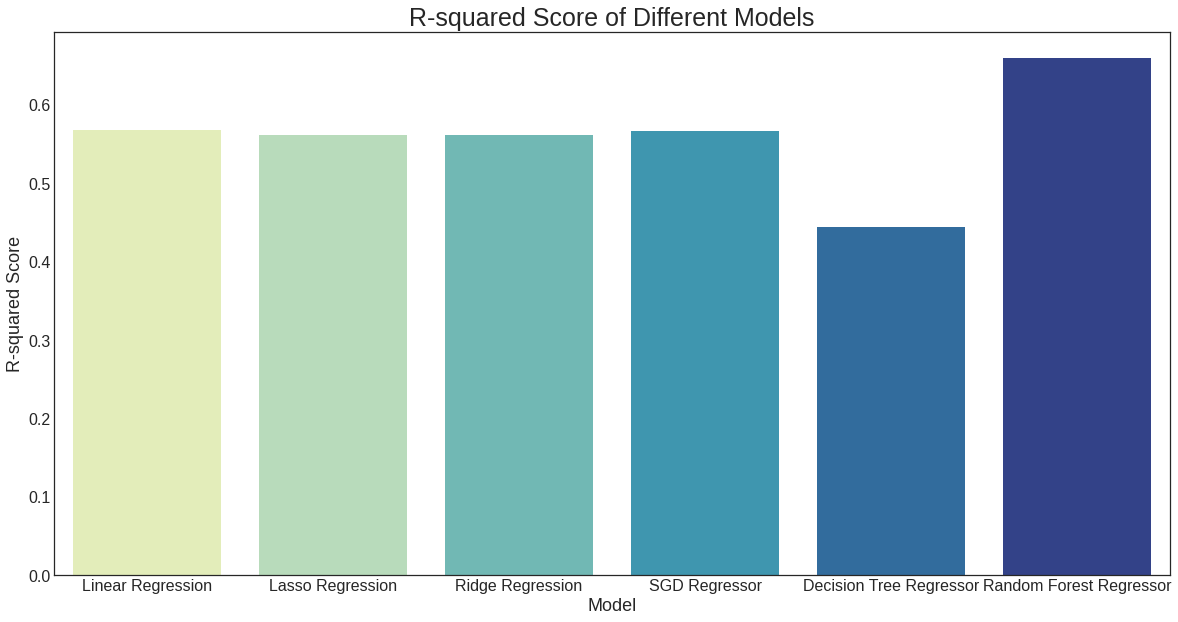

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = '16'
plt.title("R-squared Score of Different Models", fontsize=25)
plt.ylabel("R-squared Score",fontsize=18)
plt.xlabel("Models",fontsize=18)
sns.barplot(data=model_eval, x="Model", y="R-squared Score", palette="YlGnBu")
plt.show()

#4.Model Fine Tuning

We are tuning the `RandomForestRegressor` using `HalvingRandomSearch` method. We are selecting `max_depth` as the only parameter to tune (due to the computational limitations imposed by Google Colab, we are unable to tune multiple hyperparameters for this project).

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

from scipy.stats import loguniform

param_distribs = [{'randomforestregressor__max_depth': loguniform(1e-1,1e+2)}]

halving_random_search = HalvingRandomSearchCV(rdf_pipe, param_distribs, n_candidates=20, cv=3, min_resources='exhaust',
                                 scoring='r2', random_state=90)

halving_random_search.fit(df_X, df_y)
halving_random_search.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer()),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Area', 'BuildingYear',
                                                   'Year',
                                                   'AvgTimeToNearestStation',
                                                   'RoomCount', 'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('dummify',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Structure', 'Use',
                                                   'CityPlanning', 'Location',
                                                   'ConstructionYear'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=11.552597181178786,
                                       random_state=90))])

In [ ]:
halving_random_cv_res = pd.DataFrame(halving_random_search.cv_results_)
halving_random_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
halving_random_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head(10)

,iter,n_resources,param_randomforestregressor__max_depth,mean_test_score
27,2,42768,11.552597,0.667433
28,2,42768,8.585698,0.657692
29,2,42768,8.046725,0.657692
21,1,14256,8.585698,0.577584
22,1,14256,8.046725,0.577584
20,1,14256,11.552597,0.571512
24,1,14256,7.185114,0.570172
26,1,14256,5.487738,0.534504
25,1,14256,4.545286,0.492898
23,1,14256,3.23855,0.426602


After the hyperparameter tuning, our `mean_test_score` improved by 0.007

#5.Model Deployment

We are evaluating the model performace on the testing data. 

In [ ]:
# creating testing sets, storing predictors and response

test_X = test_set.drop("TradePrice", axis=1)
test_y = test_set["TradePrice"]

In [ ]:
# return the r2 score on test data

from sklearn.metrics import r2_score

final_model = halving_random_search.best_estimator_

final_predictions = final_model.predict(test_X)
final_r2 = r2_score(test_y, final_predictions)
print('Test data R^2: {:.4f}'.format(final_r2))

Test data R^2: 0.5536


#6.Conclusion

On running multiple models, we pick the `randomforestregressor` as it returns the best $R^2$ score of `0.6604`.

We use the halving random search for our hyperparamteter tuning process.
After tuning the hyperparameter on that model, we get an improved $R^2$ of `0.6674`.

We evalutate the performance of our model on the test data, for which we got an $R^2$ of `0.5536`.

Given the limited time span of this project, as next steps towards a better model we could implement ensemble techniques such as Stacking, to produce an optimal model.